In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
subprocess.check_output(["make"])

b'g++ main.cpp -o main.x -std=c++14\n'

5.000404998931103 5.00010334962301 7.07070833366457


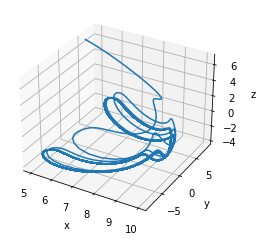

5.000939915053545 4.999078277670736 7.071054825112364


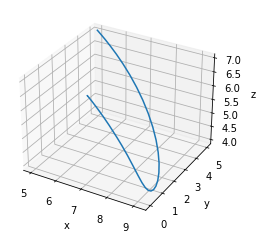

5.00263329696733 4.995872672171519 7.072122477695332


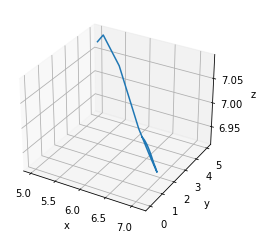

5.009361224805309 4.983029581350167 7.0764197381731275


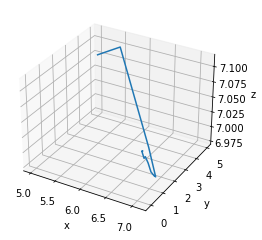

5.020517895454902 4.961611037778418 7.083559555139805


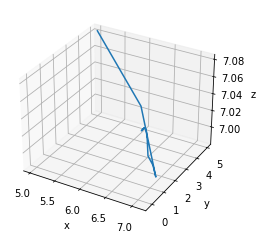

In [27]:
windspeeds=[1, 5, 10, 20, 30] #m/s
for windspeed in windspeeds:
    fig=plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    theta=[]
    phi=[]
    r=[]
    position_list=subprocess.check_output(["./main.x", "%d"%windspeed]).decode() #simulating for 10 minutes, step=0.01
    #print(position_list)
    position_list=position_list.split("\n")
    for line in position_list[:-1]:
        line=line.split(' ')
        theta.append(float(line[4]))
        phi.append(float(line[5]))
        r.append(float(line[6]))
    theta=np.array(theta)
    phi=np.array(phi)
    r=np.array(r)
    x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))
    y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
    z=np.multiply(r, np.cos(theta))
    print(x[0], y[0], z[0])
    ax.plot(x, y, z)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()